In [51]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from IPython.display import display

In [52]:
hsc_kb = pd.read_csv(r"data\datos_hsc_humad.csv", delimiter=';')

In [53]:
print(hsc_kb.shape)
hsc_kb.head()

(127, 130)


,NOMBRE,HISTORIA CLÍNICA,EDAD,≤ 60,60 - 70,71 - 80,81 - 90,>90,SEXO,ANTECEDENTES DE TRAUMA CRANEAL,...,ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 2,ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 3,ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 4,ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 5,REINTERVENCIÓ0N,ESTADO AL EGRESO,LOCALIZACIÓN DERECHO,LOCALIZACIÓN IZQUIERDO,LOCALIZACIÓN BILATERAL,
0,ELÍAS LLORENTE GARCÍA,278196,61,0,1,0,0,0,1,1,...,0,0,0,1,0,1,0,1,0,
1,ROLANDO LOPEZ CASTILLO,278376,89,0,0,0,1,0,1,1,...,0,0,1,0,0,1,1,0,0,
2,JOSÉ LORENZO GONZALES MOYA,278740,65,0,1,0,0,0,1,1,...,0,0,1,0,0,1,0,0,1,
3,NELSON SARAGOSI QUIÑONES,278823,71,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,
4,LEONARDO BAIZAN ROMERO,278918,61,0,1,0,0,0,1,0,...,0,1,1,0,0,1,1,0,0,


In [54]:
columnas_eliminar = [' ', 'NOMBRE                                ', ' HISTORIA CLÍNICA', ' ≤ 60', ' 60 - 70', ' 71 - 80', ' 81 - 90', ' >90', ' VOLUMEN DEL HEMATOMA', ' DIÁMETRO DE LA CAPA', ' < 5',' 5 - 10',' 11 - 15',' > 15', ' DIÁMETRO MAYOR TRANSVERSO']

for e in columnas_eliminar:
    hsc_kb = hsc_kb.drop(e, axis=1)
hsc_kb.head()

,EDAD,SEXO,ANTECEDENTES DE TRAUMA CRANEAL,"""FACTOR DE RIESGO 1 1,\tAlcoholismo""","""FACTOR DE RIESGO 2 2,\tInsuficiencia renal crónica""",FACTOR DE RIESGO 3 Inmunosupresión,FACTOR DE RIESGO 4 Neoplasia terminal,FACTOR DE RIESGO 5 Ingestión de antiagregante plaquetario,"""FACTOR DE RIESGO 6 \tIngestión de anticoagulante""",ANTECEDENTES NEUROLÓGICOS 1 Demencia,...,ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 1,ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 2,ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 3,ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 4,ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 5,REINTERVENCIÓ0N,ESTADO AL EGRESO,LOCALIZACIÓN DERECHO,LOCALIZACIÓN IZQUIERDO,LOCALIZACIÓN BILATERAL
0,61,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,89,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
2,65,1,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3,71,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
4,61,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,1,1,0,0


In [55]:
#para transformar la escala de glasgow al ingreso
columnas_glasgow_ingreso = [' ESCALA DE GLASGOW AL INGRESO 3',' ESCALA DE GLASGOW AL INGRESO4',' ESCALA DE GLASGOW AL INGRESO5',' ESCALA DE GLASGOW AL INGRESO6',' ESCALA DE GLASGOW AL INGRESO7',' ESCALA DE GLASGOW AL INGRESO8',' ESCALA DE GLASGOW AL INGRESO9',' ESCALA DE GLASGOW AL INGRESO 10',' ESCALA DE GLASGOW AL INGRESO 11',' ESCALA DE GLASGOW AL INGRESO 12',' ESCALA DE GLASGOW AL INGRESO 13',' ESCALA DE GLASGOW AL INGRESO 14',' ESCALA DE GLASGOW AL INGRESO 15']
columnas_bender = [' ESCALA DE BENDER 1',' ESCALA DE BENDER 2',' ESCALA DE BENDER 3',' ESCALA DE BENDER 4']
columnas_mcwalder = [' ESCALA DE MCKWALDER 0',' ESCALA DE MCKWALDER 1',' ESCALA DE MCKWALDER 2',' ESCALA DE MCKWALDER 3',' ESCALA DE MCKWALDER 4']
columnas_gordon_firing = [' ESCALA GORDON FAIRING 1',' ESCALA GORDON FAIRING 2',' ESCALA GORDON FAIRING 3',' ESCALA GORDON FAIRING 4']
columnas_nomura = [' ESCALA DE NOMURA 1 Hiperdensidad:',' ESCALA DE NOMURA 2  Isodensidad',' ESCALA DE NOMURA 3  Hipodensidad:',' ESCALA DE NOMURA 4  Densidad mixta',' ESCALA DE NOMURA 5 Tipo capa o estrato']
columnas_nakagushi = [' ESCALA DE NAKAGUCHI 1  Densidad homogénea',' ESCALA DE NAKAGUCHI 2  Tipo laminar',' ESCALA DE NAKAGUCHI 3  Tipo separado o en capa',' ESCALA DE NAKAGUCHI 4  Densidad trabeculado']
columnas_resultado_glasgow = [' ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 1',' ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 2',' ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 3',' ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 4',' ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 5']

lista_grupos_columnas =[[columnas_glasgow_ingreso, 'escala_glasgow_ingreso', 3], [columnas_bender, 'escala_bender', 1], [columnas_mcwalder, 'escala_mcwalder', 0], [columnas_gordon_firing, 'escala_gordon_firing', 1], [columnas_nomura, 'escala_nomura', 1], [columnas_nakagushi, 'escala_nakagushi', 1], [columnas_resultado_glasgow, 'escala_resultados_glasgow', 1]]

def determinar_ocurrencia_str (string, valor):
    if type(string) == str:
        if string.find(valor) != -1:
            return True
        else:
            return False
    else: return False

def agrupar_columnas_en_una_sola (df, lista_columnas_agrupar, nombre_columna_agrupada, valor_inicial_contador=1):
    campos_columna_agrupada = []
    for index, fila in df[lista_columnas_agrupar].iterrows():
        contador = valor_inicial_contador
        for columnas in lista_columnas_agrupar:
            if fila[columnas] == 1 or determinar_ocurrencia_str(fila[columnas], '1'):
                campos_columna_agrupada.append(contador)
                break
            contador += 1
    
        if contador == len(lista_columnas_agrupar) + valor_inicial_contador:
            campos_columna_agrupada.append(np.nan)

    df[nombre_columna_agrupada] = campos_columna_agrupada
    df = df.drop(lista_columnas_agrupar, axis=1)
    return df

for grupo_columnas in lista_grupos_columnas:
    hsc_kb = agrupar_columnas_en_una_sola (hsc_kb, grupo_columnas[0], grupo_columnas[1], valor_inicial_contador=grupo_columnas[2])

display(hsc_kb)

,EDAD,SEXO,ANTECEDENTES DE TRAUMA CRANEAL,"""FACTOR DE RIESGO 1 1,\tAlcoholismo""","""FACTOR DE RIESGO 2 2,\tInsuficiencia renal crónica""",FACTOR DE RIESGO 3 Inmunosupresión,FACTOR DE RIESGO 4 Neoplasia terminal,FACTOR DE RIESGO 5 Ingestión de antiagregante plaquetario,"""FACTOR DE RIESGO 6 \tIngestión de anticoagulante""",ANTECEDENTES NEUROLÓGICOS 1 Demencia,...,LOCALIZACIÓN DERECHO,LOCALIZACIÓN IZQUIERDO,LOCALIZACIÓN BILATERAL,escala_glasgow_ingreso,escala_bender,escala_mcwalder,escala_gordon_firing,escala_nomura,escala_nakagushi,escala_resultados_glasgow
0,61,1,1,0,0,0,0,0,0,0,...,0,1,0,15,2.0,2,3.0,3.0,2.0,5.0
1,89,1,1,0,0,0,0,1,0,0,...,1,0,0,15,2.0,1,3.0,2.0,1.0,4.0
2,65,1,1,0,0,0,0,0,0,1,...,0,0,1,12,3.0,3,2.0,3.0,2.0,4.0
3,71,1,1,0,0,0,0,1,0,1,...,0,0,1,12,3.0,3,2.0,3.0,2.0,1.0
4,61,1,0,0,0,0,0,0,1,0,...,1,0,0,15,1.0,1,2.0,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,74,1,1,0,0,0,0,0,0,0,...,0,1,0,15,2.0,2,3.0,2.0,2.0,5.0
123,65,1,1,0,0,0,0,0,0,0,...,0,1,0,13,3.0,2,4.0,5.0,3.0,4.0
124,63,1,1,0,0,0,0,0,0,0,...,0,1,0,14,2.0,2,2.0,NaN,3.0,2.0
125,62,1,1,0,0,0,0,0,0,0,...,1,0,0,15,1.0,0,4.0,2.0,1.0,5.0


In [56]:
print("cantidad de valores faltantes en la escala de glasgow: ", hsc_kb['escala_glasgow_ingreso'].isna().sum())

cantidad de valores faltantes en la escala de glasgow:  0


ya que hemos eliminado las columnas redundantes, inservibles para análisis y además hemos agrupado los valores para las escalas para mejor trabajo de los algoritmos que emplearemos mas adelante, vamos a rellenar los datos faltantes, que pueden deberse tanto a valores nulos como a campos con strings vacias o llenas de espacios en blanco

In [57]:
#convertir strings vacias y solo con espacios en blanco a Nan
# Reemplazar espacios en blanco por NaN
hsc_kb.replace('None', np.nan, inplace=True)
hsc_kb.replace("", np.nan, inplace=True)
hsc_kb.replace(r'^\s*$', np.nan, regex=True, inplace=True)

#remplazar los valores que sean string a numero, aunque tengan espacios en blanco de sobra y cambiar comas por puntos para los valores de punto flotante
hsc_kb = hsc_kb.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(",", ".").str.strip(), errors='coerce'))

#ahora vamos a llenar los campos Nan
#codigo para variables categoricas
# Antes de llamar a la función, revisa las columnas categóricas
def corregir_faltantes_categoricos(df, lista_columnas):
    for columna in lista_columnas:
        distribucion_categorica = df[columna].value_counts(normalize=True)
        valores_aleatorios = np.random.choice(distribucion_categorica.index, size=hsc_kb[columna].isnull().sum(), p=distribucion_categorica.values)
        df.loc[df[columna].isnull(), columna] = valores_aleatorios
    return df
#codigo para variables continuas
def corregir_faltantes_continuos(df, lista_columnas):
    for columna in lista_columnas:
        media = df[columna].mean()
        desviacion_estandar = df[columna].std()
        cant_nan = df[columna].isna().sum()
        
        valores_aleatorios = np.random.normal(loc=media, scale=desviacion_estandar, size=cant_nan)
        valores_aleatorios = np.round(valores_aleatorios).clip(0)
        
        df.loc[df[columna].isna(), columna] = valores_aleatorios
    return df

lista_columnas_continuas = [' EDAD', ' DESVIACIÓN DE LÍNEA MEDIA',]
lista_columnas_categoricas = hsc_kb.columns.difference(lista_columnas_continuas)

corregir_faltantes_categoricos(hsc_kb, lista_columnas_categoricas)
corregir_faltantes_continuos(hsc_kb, lista_columnas_continuas)

,EDAD,SEXO,ANTECEDENTES DE TRAUMA CRANEAL,"""FACTOR DE RIESGO 1 1,\tAlcoholismo""","""FACTOR DE RIESGO 2 2,\tInsuficiencia renal crónica""",FACTOR DE RIESGO 3 Inmunosupresión,FACTOR DE RIESGO 4 Neoplasia terminal,FACTOR DE RIESGO 5 Ingestión de antiagregante plaquetario,"""FACTOR DE RIESGO 6 \tIngestión de anticoagulante""",ANTECEDENTES NEUROLÓGICOS 1 Demencia,...,LOCALIZACIÓN DERECHO,LOCALIZACIÓN IZQUIERDO,LOCALIZACIÓN BILATERAL,escala_glasgow_ingreso,escala_bender,escala_mcwalder,escala_gordon_firing,escala_nomura,escala_nakagushi,escala_resultados_glasgow
0,61.0,1,1,0,0,0.0,0,0,0,0,...,0.0,1.0,0.0,15,2.0,2,3.0,3.0,2.0,5.0
1,89.0,1,1,0,0,0.0,0,1,0,0,...,1.0,0.0,0.0,15,2.0,1,3.0,2.0,1.0,4.0
2,65.0,1,1,0,0,0.0,0,0,0,1,...,0.0,0.0,1.0,12,3.0,3,2.0,3.0,2.0,4.0
3,71.0,1,1,0,0,0.0,0,1,0,1,...,0.0,0.0,1.0,12,3.0,3,2.0,3.0,2.0,1.0
4,61.0,1,0,0,0,0.0,0,0,1,0,...,1.0,0.0,0.0,15,1.0,1,2.0,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,74.0,1,1,0,0,0.0,0,0,0,0,...,0.0,1.0,0.0,15,2.0,2,3.0,2.0,2.0,5.0
123,65.0,1,1,0,0,0.0,0,0,0,0,...,0.0,1.0,0.0,13,3.0,2,4.0,5.0,3.0,4.0
124,63.0,1,1,0,0,0.0,0,0,0,0,...,0.0,1.0,0.0,14,2.0,2,2.0,2.0,3.0,2.0
125,62.0,1,1,0,0,0.0,0,0,0,0,...,1.0,0.0,0.0,15,1.0,0,4.0,2.0,1.0,5.0


bien, con la base de conocimiento ya limpia, vamos a exportarla para usarla en otro momento

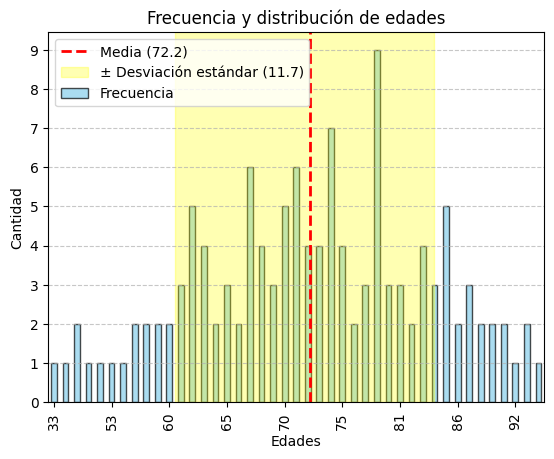

In [65]:
hsc_kb[' EDAD'] = pd.to_numeric(hsc_kb[' EDAD'], errors='coerce').dropna().round().astype(int)
conteo = hsc_kb[' EDAD'].value_counts().sort_index()
media = hsc_kb[' EDAD'].mean()
desviacion = hsc_kb[' EDAD'].std()
# Crear el gráfico de barras
ax = conteo.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7, label='Frecuencia')

edades = conteo.index.tolist()
pos_media = np.interp(media, edades, range(len(edades)))
pos_min = np.interp(media - desviacion, edades, range(len(edades)))
pos_max = np.interp(media + desviacion, edades, range(len(edades)))

# Añadir líneas VERTICALES (usando posiciones mapeadas)
ax.axvline(x=pos_media, color='red', linestyle='--', linewidth=2, label=f'Media ({media:.1f})')
ax.axvspan(pos_min, pos_max, color='yellow', alpha=0.3, label=f'± Desviación estándar ({desviacion:.1f})')

ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Personalizar el gráfico
plt.title('Frecuencia y distribución de edades')
plt.xlabel('Edades')
plt.ylabel('Cantidad')
plt.xticks(rotation=90) 
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

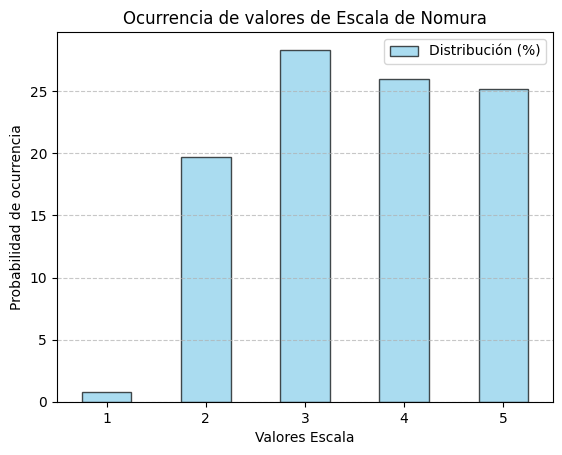

In [71]:
hsc_kb['escala_nomura'] = pd.to_numeric(hsc_kb['escala_nomura'], errors='coerce').dropna().round().astype(int)
distribucion = hsc_kb['escala_nomura'].value_counts(normalize=True).sort_index() * 100

# Crear el gráfico de barras
ax = distribucion.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7, label='Distribución (%)')

# Personalizar el gráfico
plt.title('Ocurrencia de valores de Escala de Nomura')
plt.xlabel('Valores Escala')
plt.ylabel('Probabilidad de ocurrencia')
plt.xticks(rotation=0) 
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [59]:
#hsc_kb.to_csv(r"data\datos_hsc_humad_limpios.csv", sep=';', index=False)